In [1]:
!pip install optax==0.1.7
!pip install dmlab2d
!pip install dm-meltingpot
!pip install orbax-checkpoint==0.5.20
!pip install jax==0.4.13
!pip install jaxlib==0.4.13

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.2/222.2 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.1/86.1 MB 7.9 MB/s eta 0:00:00
  Attempting uninstall: jaxlib
    Found existing installation: jaxlib 0.4.13
    Uninstalling jaxlib-0.4.13:
      Successfully uninstalled jaxlib-0.4.13
  Attempting uninstall: jax
    Found existing installation: jax 0.4.13
    Uninstalling jax-0.4.13:
      Successfully uninstalled jax-0.4.13
  Attempting uninstall: orbax-checkpoint
    Found existing installation: orbax-checkpoint 0.6.4
    Uninstalling orbax-checkpoint-0.6.4:
      Successfully uninstalled orbax-checkpoint-0.6.4
  Using cached jax-0.4.13-py3-none-any.whl
  Attempting uninstall: jax
    Found existing installation: jax 0.4.34
    Uninstalling jax-0.4.34:
      Successfully uninstalled jax-0.4.34
ERROR: pip's dependency resolver does not currently take into account all the packages th

Claves de la observación del agente 0: dict_keys(['COLLECTIVE_REWARD', 'ORIENTATION', 'POSITION', 'READY_TO_SHOOT', 'RGB', 'WORLD.RGB'])


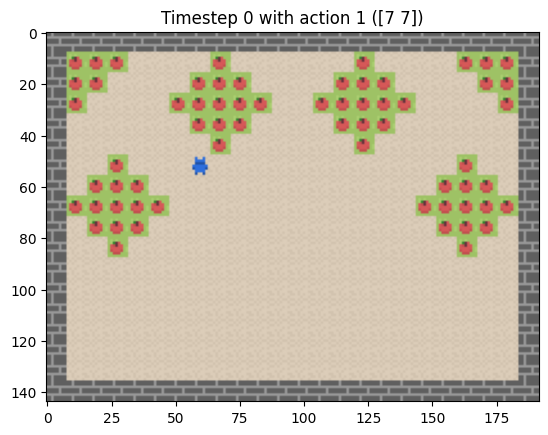

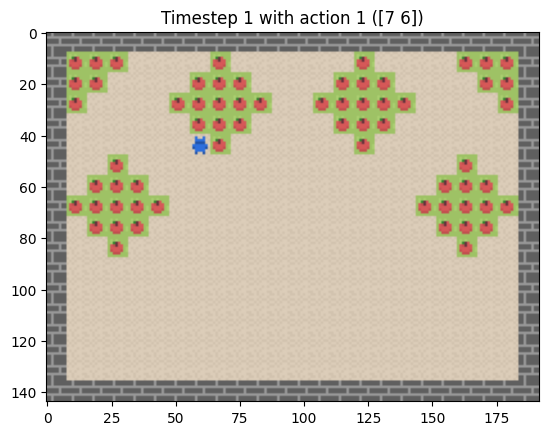

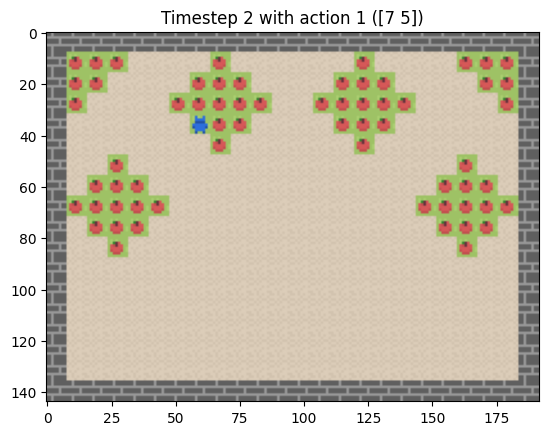

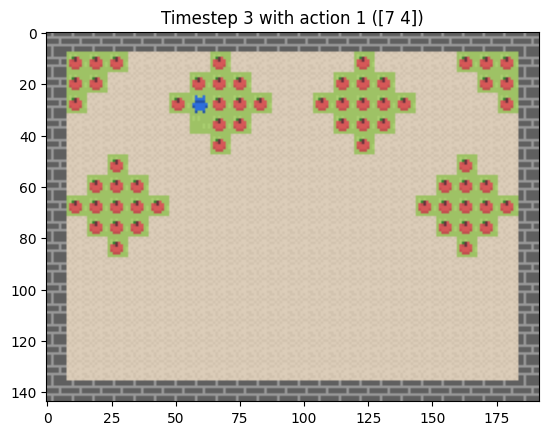

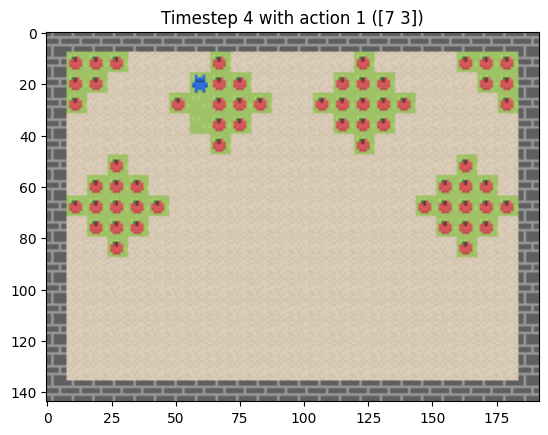

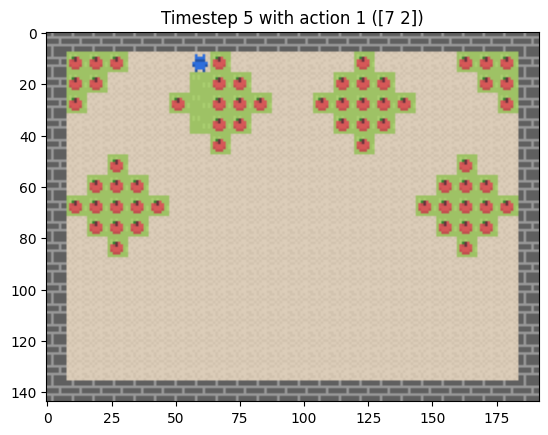

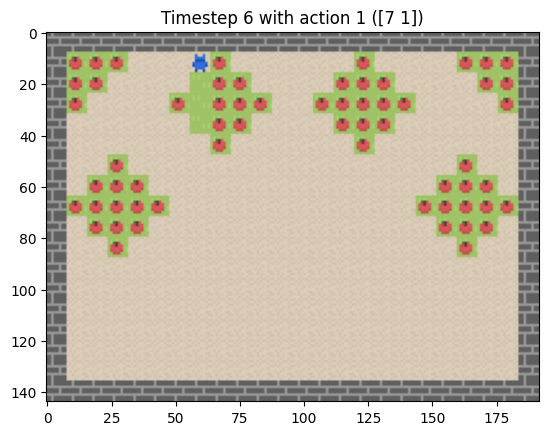

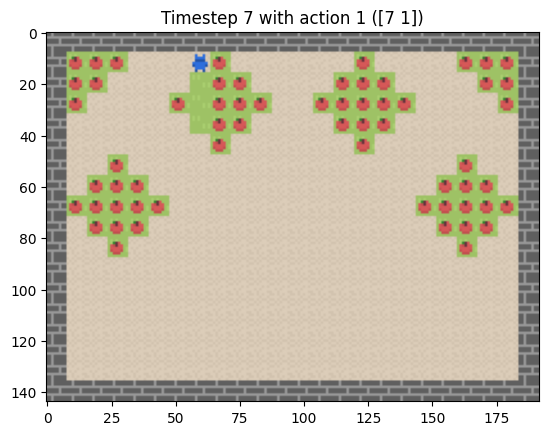

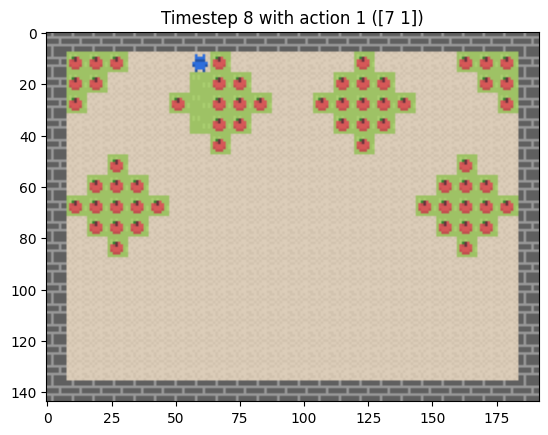

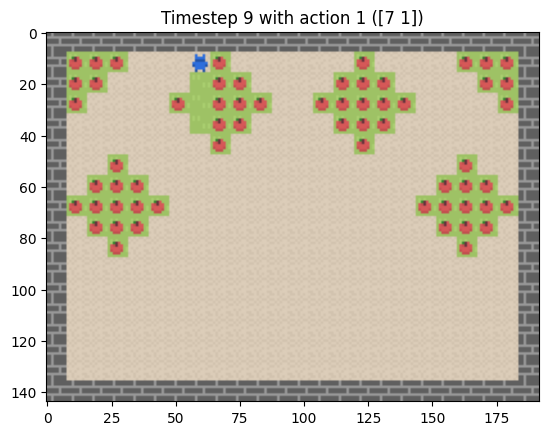

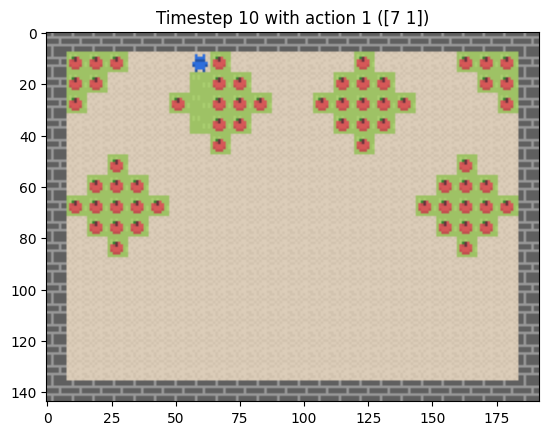

In [4]:
import matplotlib.pyplot as plt
import dm_env
import numpy as np

# Ahora importar 'substrate' después de haber modificado '_ENABLE_DEBUG_OBSERVATIONS'
from meltingpot.python import substrate

# Change _ENABLE_DEBUG_OBSERVATIONS = True
# /usr/local/lib/python3.10/dist-packages/meltingpot/configs/substrates/commons_harvest__open.py

# Nombre del sustrato
env_name = 'commons_harvest__open'

# Cargar la configuración del escenario
env_config = substrate.get_config(env_name)

# Agregar 'POSITION' y 'ORIENTATION' a las observaciones individuales
with env_config.unlocked():
    env_config.individual_observation_names.extend(['POSITION', 'ORIENTATION'])

    # Definir las especificaciones de las nuevas observaciones
    position_spec = dm_env.specs.Array(shape=(2,), dtype=float, name='POSITION')
    orientation_spec = dm_env.specs.Array(shape=(), dtype=float, name='ORIENTATION')

    # Actualizar el timestep_spec
    env_config.timestep_spec = dm_env.TimeStep(
        step_type=env_config.timestep_spec.step_type,
        reward=env_config.timestep_spec.reward,
        discount=env_config.timestep_spec.discount,
        observation={
            **env_config.timestep_spec.observation,
            'POSITION': position_spec,
            'ORIENTATION': orientation_spec,
        }
    )

# Definir el número de agentes
num_agents = 1  # Puedes cambiar este valor

# Obtener los roles de los jugadores (asumiendo que todos tienen el mismo rol)
roles = [env_config.default_player_roles[0]] * num_agents

# Crear el entorno con el número especificado de agentes y la configuración actualizada
env = substrate.build_from_config(env_config, roles=roles)

# Restablecer el entorno
timestep = env.reset()

# Verificar las claves de la observación
print("Claves de la observación del agente 0:", timestep.observation[0].keys())

# Inicializar variables para rastrear estados
agent_states = [{'observations': [], 'actions': []} for _ in range(num_agents)]

c = 0
# Bucle de interacción con el entorno
done = False
while not done:
    actions = []
    for agent_idx in range(num_agents):
        # Obtener la observación del agente
        observation = timestep.observation[agent_idx]

        # Acceder a la posición y orientación
        position = observation['POSITION']      # (x, y)
        orientation = observation['ORIENTATION']  # Dirección en la que mira el agente

        # Definir una política para seleccionar acciones
        action = 1  # Por ejemplo, mover hacia adelante

        actions.append(action)

        # Actualizar el estado del agente
        agent_states[agent_idx]['observations'].append(observation)
        agent_states[agent_idx]['actions'].append(action)

    # Realizar un paso en el entorno
    timestep = env.step(actions)

    # Verificar si el episodio ha terminado
    done = timestep.last()

    # (Opcional) Visualizar el entorno o imprimir información
    plt.title(f'Timestep {c} with action {action} ({position})')
    plt.imshow(timestep.observation[0]['WORLD.RGB'])
    plt.pause(0.001)

    if c == 10:
        break

    c += 1

# Cerrar el entorno al finalizar
env.close()
